<a href="https://colab.research.google.com/github/AbhayMudgal/MINST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as K

mnist = K.datasets.fashion_mnist

In [4]:
class myCallback(K.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('acc')>0.9):
      print("90% accuracy reached")
      self.model.stop_training = True


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
#print(x_train.shape, x_test.shape) 
x_train_CNN = x_train
x_test_CNN = x_test

x_train_CNN = x_train_CNN.reshape(60000, 28, 28, 1)
x_test_CNN = x_test_CNN.reshape(10000, 28, 28, 1)

In [6]:
neural_network = K.models.Sequential([
  K.layers.Flatten(input_shape = (28, 28)),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dense(10, activation = 'softmax')   
])

CNN = K.models.Sequential([
  K.layers.Conv2D(8, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
  K.layers.MaxPool2D(2, 2),
  K.layers.Flatten(),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dense(10, activation = 'softmax')                       
])

CNN2 = CNN = K.models.Sequential([
  K.layers.Conv2D(8, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
  K.layers.MaxPool2D(2, 2),
  K.layers.Conv2D(16, (3, 3), activation = 'relu'),
  K.layers.MaxPool2D(2, 2),
  K.layers.Flatten(),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dense(10, activation = 'softmax')                       
])

In [26]:
opt1 = K.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.99, decay = 0.1)
opt2 = K.optimizers.Adam(lr = 2, beta_1 = 0.9, beta_2 = 0.99, decay = 0.1)
opt3 = K.optimizers.Adam(lr = 0.5, beta_1 = 0.9, beta_2 = 0.99, decay = 0.1)

In [27]:
neural_network.compile(optimizer = opt2, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
CNN.compile(optimizer = opt3, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
CNN2.compile(optimizer = opt1, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 2**(epoch / 2))

In [ ]:
history_NN = neural_network.fit(x_train, y_train, epochs = 20, validation_split = 0.1, callback = [lr_schedule], shuffle = True)

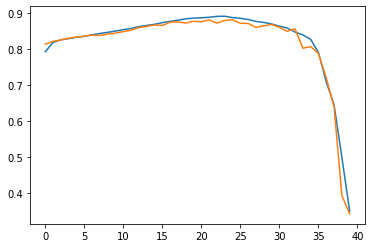

In [10]:
plt.plot(history_NN.history['accuracy'], label = 'train')
plt.plot(history_NN.history['val_accuracy'], label = 'validation')
plt.show()

(0.001, 10.0, 0.0, 1.0)

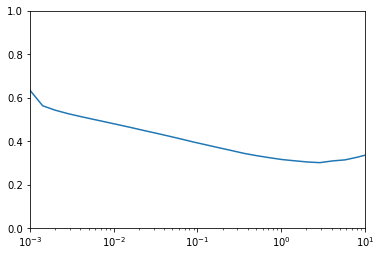

In [14]:
plt.semilogx(history_NN.history["lr"], history_NN.history["loss"])
plt.axis([1e-3, 1e1, 0, 1])

In [19]:

history_NN = neural_network.fit(x_train, y_train, epochs = 20, validation_split = 0.1, shuffle = True)

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4361 - accuracy: 0.8498 - val_loss: 0.5659 - val_accuracy: 0.8365
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4340 - accuracy: 0.8505 - val_loss: 0.5615 - val_accuracy: 0.8363
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4318 - accuracy: 0.8514 - val_loss: 0.5646 - val_accuracy: 0.8372
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4301 - accuracy: 0.8522 - val_loss: 0.5575 - val_accuracy: 0.8398
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4280 - accuracy: 0.8525 - val_loss: 0.5578 - val_accuracy: 0.8410
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4260 - accuracy: 0.8532 - val_loss: 0.5567 - val_accuracy: 0.8405
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4243 - accuracy: 0.8542 - val_loss: 0.5531 - val_accuracy:

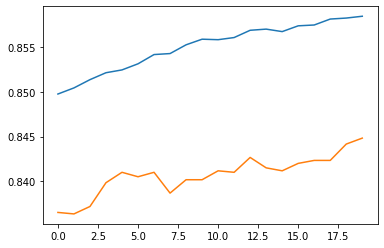

In [20]:
plt.plot(history_NN.history['accuracy'], label = 'train')
plt.plot(history_NN.history['val_accuracy'], label = 'validation')
plt.show()

In [23]:
history_CNN = CNN.fit(x_train_CNN, y_train, epochs = 20, validation_split = 0.1, callbacks = [lr_schedule], shuffle = True)

Epoch 1/20
1688/1688 [==============================] - 35s 3ms/step - loss: 1.0347 - accuracy: 0.6762 - val_loss: 0.7442 - val_accuracy: 0.7438
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7478 - accuracy: 0.7421 - val_loss: 0.7060 - val_accuracy: 0.7490
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7102 - accuracy: 0.7500 - val_loss: 0.6830 - val_accuracy: 0.7517
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6901 - accuracy: 0.7541 - val_loss: 0.6637 - val_accuracy: 0.7565
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6684 - accuracy: 0.7613 - val_loss: 0.6455 - val_accuracy: 0.7598
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6527 - accuracy: 0.7646 - val_loss: 0.6280 - val_accuracy: 0.7705
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6374 - accuracy: 0.7702 - val_loss: 0.6101 - val_accuracy

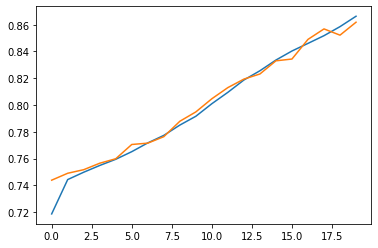

In [28]:
plt.plot(history_CNN.history['accuracy'], label = 'train')
plt.plot(history_CNN.history['val_accuracy'], label = 'validation')
plt.show()

(0.001, 10.0, 0.0, 1.0)

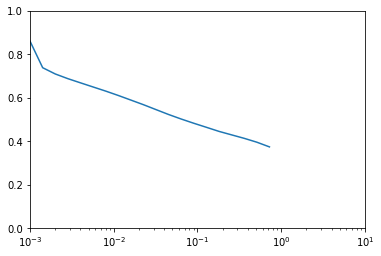

In [25]:
plt.semilogx(history_CNN.history["lr"], history_CNN.history["loss"])
plt.axis([1e-3, 1e1, 0, 1])

In [29]:
history_CNN = CNN.fit(x_train_CNN, y_train, epochs = 20, validation_split = 0.1, callbacks = [lr_schedule], shuffle = True)

Epoch 1/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3521 - accuracy: 0.8738 - val_loss: 0.3469 - val_accuracy: 0.8732
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3283 - accuracy: 0.8812 - val_loss: 0.3473 - val_accuracy: 0.8735
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3273 - accuracy: 0.8831 - val_loss: 0.3461 - val_accuracy: 0.8740
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3239 - accuracy: 0.8841 - val_loss: 0.3454 - val_accuracy: 0.8757
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3259 - accuracy: 0.8842 - val_loss: 0.3434 - val_accuracy: 0.8755
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3237 - accuracy: 0.8840 - val_loss: 0.3428 - val_accuracy: 0.8747
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3314 - accuracy: 0.8818 - val_loss: 0.3431 - val_accuracy:

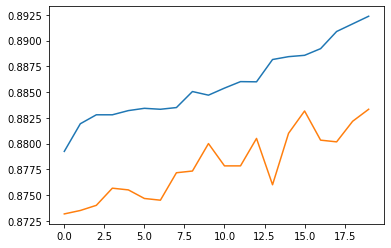

In [30]:
plt.plot(history_CNN.history['accuracy'], label = 'train')
plt.plot(history_CNN.history['val_accuracy'], label = 'validation')
plt.show()